# Comparison of Features extracted via Matrices to those extracted via Neo4j

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Degree Comparisons

In [2]:
orig_deg = pd.read_table('../../../store/projects/learn/prediction/features/features.tsv.bz2')
orig_deg = orig_deg[['compound_id', 'disease_id'] + [c for c in orig_deg.columns if c.startswith('degree_')]]
orig_deg.head(2)

/home/mmayers/software/anaconda3/envs/ml/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,compound_id,disease_id,degree_CbG,degree_CcSE,degree_CdG,degree_CiPC,degree_CpD,degree_CrC,degree_CtD,degree_CuG,degree_DaG,degree_DdG,degree_DlA,degree_DpC,degree_DpS,degree_DrD,degree_DtC,degree_DuG
0,DB01048,DOID:10652,3,136,0,2,0,2,1,0,196,250,20,5,44,3,4,250
1,DB05812,DOID:10652,8,71,0,0,0,1,1,0,196,250,20,5,44,3,4,250


In [3]:
mat_degs = pd.read_table('degree-features.tsv.bz2')

In [4]:
degs = pd.merge(orig_deg, mat_degs, on=['compound_id', 'disease_id'])

In [5]:
def compare_degrees(feature):
    old_feature = 'degree_' + feature
    return (degs[old_feature] - degs[feature]).sum()

In [6]:
print('Feature','\t', 'Num Different')

for feature in mat_degs.columns:
    if feature != 'compound_id' and feature != 'disease_id':
        print(feature, '\t\t', compare_degrees(feature))

Feature 	 Num Different
CbG 		 0
CcSE 		 0
CdG 		 0
CiPC 		 952
CpD 		 0
CrC 		 0
CtD 		 0
CuG 		 0
DaG 		 0
DdG 		 0
DlA 		 0
DpC 		 0
DpS 		 0
DrD 		 0
DtC 		 0
DuG 		 0


There shouldn't be any difference between these, so let's look at exactly how many and which compounds are showing a difference in degree features for Pharmacologic Class

In [7]:
diff = degs.query('CiPC != degree_CiPC')[['compound_id', 'disease_id', 'CiPC', 'degree_CiPC']]
len(set(diff['compound_id']))

5

In [8]:
diff.drop_duplicates(subset='compound_id')

,compound_id,disease_id,CiPC,degree_CiPC
917,DB00244,DOID:10652,1,4
1009,DB01183,DOID:10652,1,2
1053,DB00368,DOID:10652,2,3
1066,DB00338,DOID:10652,1,2
1195,DB00860,DOID:10652,1,2


Spot checking the first compound (DB00244) in the included .csv, I found it to have only 1 `includes_PCiC` edge. Therefore, the .csv I have may be a subtly different version of the network than that used for the computations in the original [learn]('https://github.com/dhimmel/learn') pipline.

# DWPC Comparisons

There are some metapaths that we know we cannot produce the exact same results.  However, lets see how many we can get exact, what the charactersitic of the paths are where we can't get them, and how different the results are.

In [9]:
orig_dwpc = pd.read_table('../../../store/projects/learn/all-features/data/matrix/features.tsv.bz2')
orig_dwpc.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
0,rephetio-v2.0_perm-5,DB00014,DOID:0060073,0,1,lymphatic system cancer,Goserelin,0.022675,2,249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.028591,0.004754,0.0,0.0


In [10]:
orig_dwpc = orig_dwpc.loc[orig_dwpc['hetnet'] == 'rephetio-v2.0']
orig_dwpc.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
1,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.028591,0.004754,0.0,0.0
13,rephetio-v2.0,DB00206,DOID:0060073,0,1,lymphatic system cancer,Reserpine,0.011069,8,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003003,0.001488,0.0,0.0


In [11]:
mat_dwpc = pd.read_table('dwpc-features.tsv.bz2')
mat_dwpc.head(2)

,compound_id,disease_id,CbG<rG<rGaD,CbG<rG<rGdD,CbG<rG<rGuD,CbG<rGaD,CbG<rGaDrD,CbG<rGbCpD,CbG<rGbCtD,CbG<rGcGaD,...,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
0,DB00014,DOID:0050156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002885,0.0,0.000216,0.000661,0.001791
1,DB00014,DOID:0050425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [12]:
m = pd.merge(orig_dwpc, mat_dwpc, how='left', on=['compound_id', 'disease_id'], suffixes=('', '_mat'))

In [13]:
m.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CuGuDpCpD_mat,CuGuDpCtD_mat,CuGuDpSpD_mat,CuGuDrD_mat,CuGuDrDrD_mat,CuGuDtCpD_mat,CuGuDtCtD_mat,CuGuDuGaD_mat,CuGuDuGdD_mat,CuGuDuGuD_mat
0,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.028590,0.004754,0.0,0.0
1,rephetio-v2.0,DB00206,DOID:0060073,0,1,lymphatic system cancer,Reserpine,0.011069,8,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003003,0.001488,0.0,0.0


In [14]:
def is_same(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return (abs(diff) > .0001).sum() == 0

#### CbGaD

Should produce the same results since no metanodes are repeated

In [15]:
is_same(m['CbGaD'], m['CbGaD_mat'])

True

## How many Metapaths are different and which are they?

In [16]:
metapaths = list(orig_dwpc.columns)[24:]

res = 0
for mp in metapaths:
    res += is_same(m[mp], m[mp+'_mat'])
print('{} / {} = {:1.2%}'.format(res, len(metapaths), (res/len(metapaths))))

1185 / 1206 = 98.26%


In [17]:
def num_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return sum(abs(diff) > 0.0001)

def max_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return max(abs(diff))

def avg_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return diff[abs(diff) > .0001].mean()

In [18]:
dmps = []
nd = []
md = []
ad = []

for mp in metapaths:
    o = m[mp]
    n = m[mp+'_mat']
    
    if not is_same(o, n):
        dmps.append(mp)
        nd.append(num_diff(o, n))
        md.append(max_diff(o, n))
        ad.append(avg_diff(o, n))
        
result = pd.DataFrame({'num_diff': nd, 'max_diff': md, 'avg_diff': ad}, index=dmps)
result.head()

,avg_diff,max_diff,num_diff
CpDpCpDrD,-0.002104,0.003205,2
CpDpCrCpD,0.003427,0.006390,4
CpDpCtDrD,-0.002971,0.002971,1
CpDrDpCpD,0.000201,0.001123,3
CpDrDrDrD,0.024234,0.137000,49


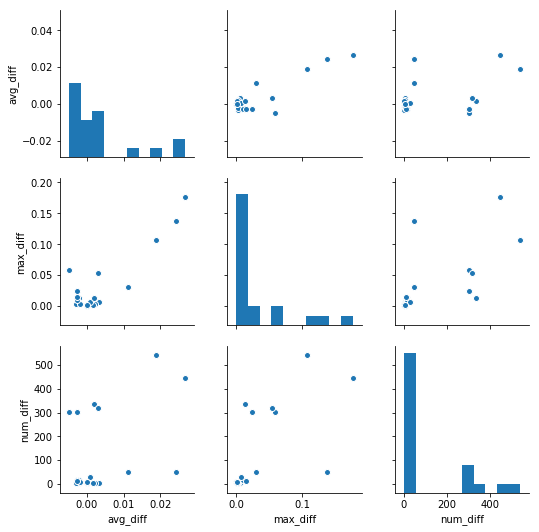

In [19]:
sns.pairplot(result);

In [20]:
for i, mp in enumerate(dmps):
    print(mp, end=', ')
    if (i+1) % 7 == 0:
        print('')

CpDpCpDrD, CpDpCrCpD, CpDpCtDrD, CpDrDpCpD, CpDrDrDrD, CpDrDtCpD, CpDrDtCtD, 
CrCpDpCpD, CrCpDtCtD, CrCrCrCpD, CrCrCrCtD, CrCtDtCtD, CtDpCrCtD, CtDrDpCpD, 
CtDrDpCtD, CtDrDrDrD, CtDrDtCtD, CtDtCpDrD, CtDtCrCpD, CtDtCrCtD, CtDtCtDrD, 


Looking at all the metapaths that did not produce the same result as Neo4j, the main issues seem to be of type ABABB, ABBAB, or AAAA issue... Now have 98.2

# Plotting some of the differences

In [21]:
def plot_difference(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    
    dwpc_nonzero = (old_dwpc != 0).sum()
    mat_nonzero = (new_dwpc != 0).sum()
    became_nonzero = ((old_dwpc == 0) & (new_dwpc != 0)).sum()
    
    num_different = (abs(diff) > 0.0001).sum()
    
    plt.clf()
    sns.distplot(diff[abs(diff) > .0001], kde=False, rug=True)
    
    feature = old_dwpc.name
    
    text = """
    Non-Zero DWPC values (no-replacement): {}
    Zero DWPC values that became Non-Zero: {}
    Total number of values that changed: {}""".format(dwpc_nonzero, became_nonzero, num_different)
    
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    x_mid = (xlim[1] + xlim[0]) / 2
    y_mid = (ylim[1] + ylim[0]) / 2
    
    if x_mid > 0:
        x_pos = x_mid/4
    else:
        x_pos = 2*x_mid
    
    plt.text(x_pos, 3*y_mid/2, text)
    plt.xlabel('Difference in DWPC calculation (Neo4j - Matrix)')
    plt.ylabel('Frequency')
    plt.title('Distribution of differences of calcualtion of feature {}'.format(feature))
    
    
def plot_difference2(old, new):
    diff = new - old
    feature = old.name
    idx = diff[abs(diff) > .0001].index
    
    num_diff = len(idx)
    
    plt.clf()
    f = plt.scatter(old, new, c=sns.color_palette()[0], label='Equal')
    plt.scatter(old.loc[idx], new.loc[idx], c=sns.color_palette()[1], label='Different')
    
    xlim = f.axes.get_xlim()
    ylim = f.axes.get_ylim()
    
    start = min(xlim[0], ylim[0])
    end = max(xlim[1], ylim[1])
    
    plt.plot([start, end], [start, end], 'k--', alpha=.8, label='Line of Equality')
    
    x_mid = (xlim[1] + xlim[0]) / 2
    y_mid = (ylim[1] + ylim[0]) / 2
    
    if x_mid > 0:
        x_pos = x_mid
    else:
        x_pos = 2*x_mid
    
    text = 'Number different: {} = {:.2%}'.format(num_diff, num_diff/len(diff))
    
    plt.text(x_pos, y_mid/5, text)

    
    plt.xlabel('Original DWPC')
    plt.ylabel('Matrix DWPC')
    plt.legend(loc=2)
    plt.title('Matrix calculated DWPC vs. Old Neo4j extracted DWPC\nfor feature {}'.format(feature))
    
def compare_metapath(mp, plt_type=1):
    if is_same(m[mp], m[mp+'_mat']):
        print('The Neo4j and Matrix calculations are the same for metapath {}'.format(mp))
    elif plt_type == 1:
        plot_difference(m[mp], m[mp+'_mat'])
    elif plt_type == 2:
        plot_difference2(m[mp], m[mp+'_mat'])

## Plot all the differences to see their magnitude

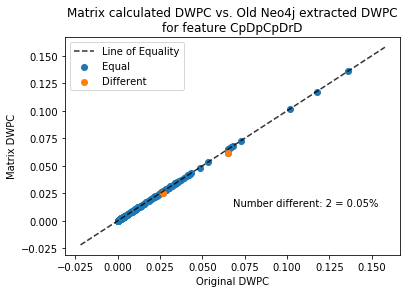

In [22]:
compare_metapath(dmps[0], 2)

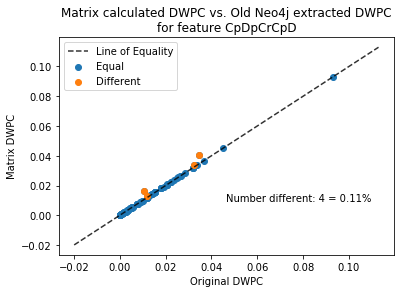

In [23]:
compare_metapath(dmps[1], 2)

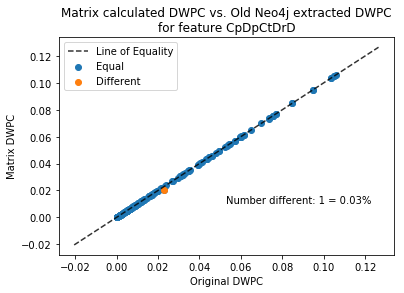

In [24]:
compare_metapath(dmps[2], 2)

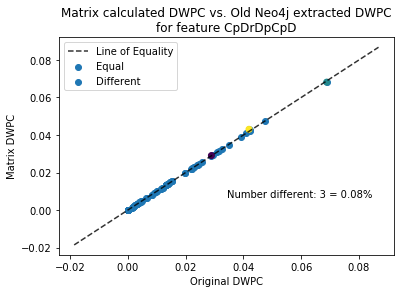

In [25]:
compare_metapath(dmps[3], 2)

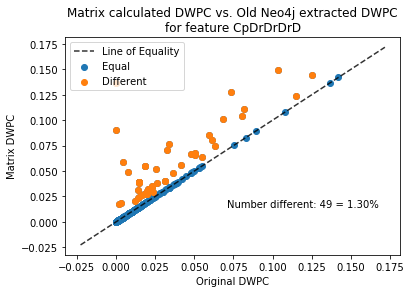

In [26]:
compare_metapath(dmps[4], 2)

Visiting the Disease metanode 4x in a row means this will likely be a blacklisted feature

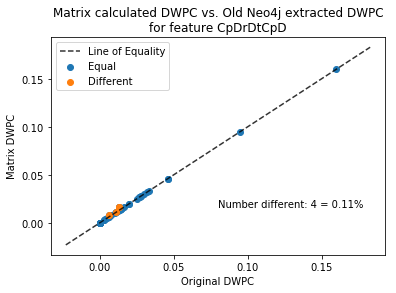

In [27]:
compare_metapath(dmps[5], 2)

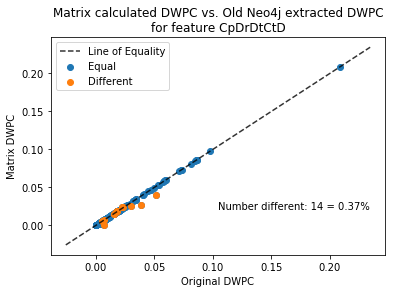

In [28]:
compare_metapath(dmps[6], 2)

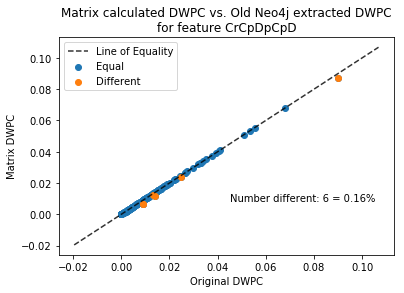

In [29]:
compare_metapath(dmps[7], 2)

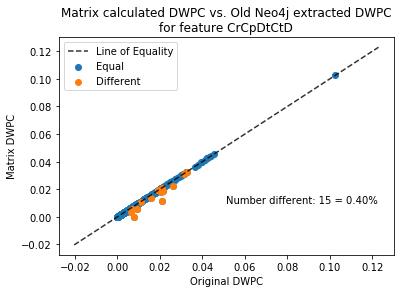

In [30]:
compare_metapath(dmps[8], 2)

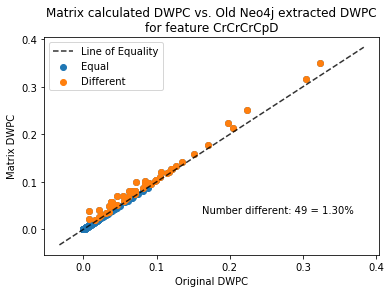

In [31]:
compare_metapath(dmps[9], 2)

This will be a blacklisted feature

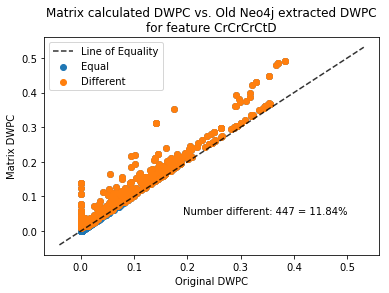

In [32]:
compare_metapath(dmps[10], 2)

This will be blacklisted

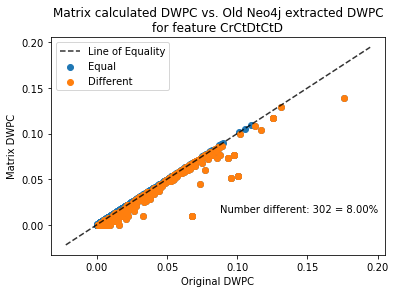

In [33]:
compare_metapath(dmps[11], 2)

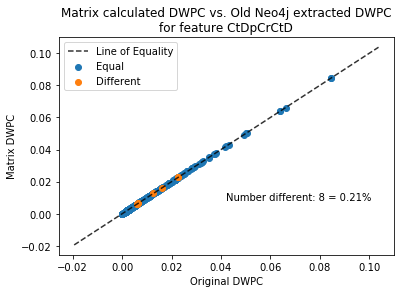

In [34]:
compare_metapath(dmps[12], 2)

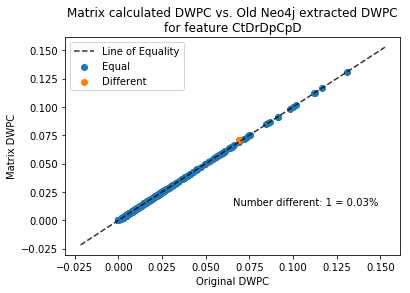

In [35]:
compare_metapath(dmps[13], 2)

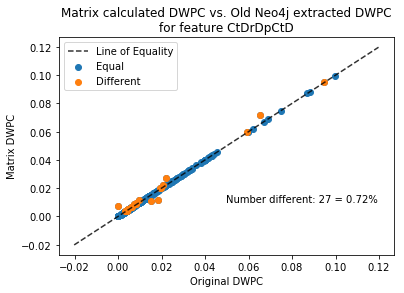

In [36]:
compare_metapath(dmps[14], 2)

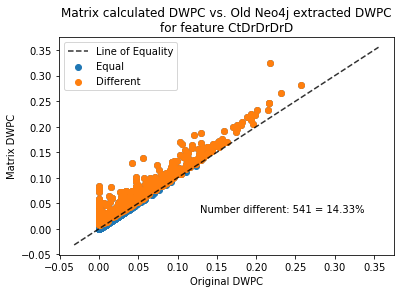

In [37]:
compare_metapath(dmps[15], 2)

This is another feature that will be blacklisted

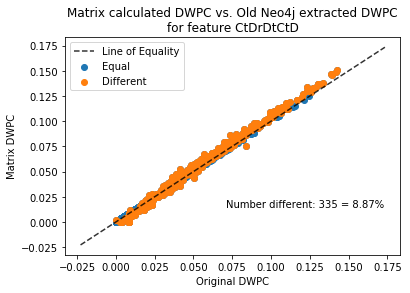

In [38]:
compare_metapath(dmps[16], 2)

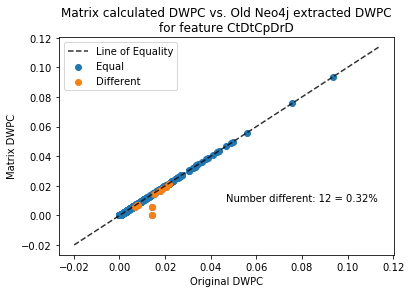

In [39]:
compare_metapath(dmps[17], 2)

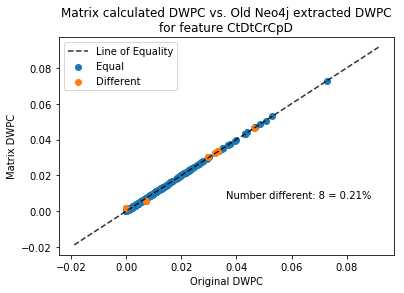

In [40]:
compare_metapath(dmps[18], 2)

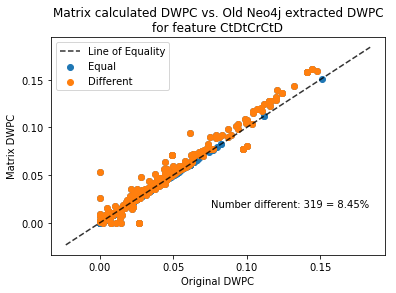

In [41]:
compare_metapath(dmps[19], 2)

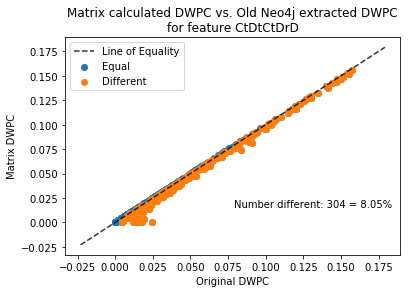

In [42]:
compare_metapath(dmps[20], 2)